Life Cycle of Machine Learning
- Understanding Business Problem/Problem Statement
- Data Collection
- Data Checks to perform
- EDA
- Data Pre-Processing
- Model Training
- Model Evaluation

**Problem Statement:** Understanding how student score affected by the other varaibles such as Gender, ethnicity, parental education and more. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('D:/Projects/StudentPerformanceIndicator/notebook/data/stud.csv')

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape

(1000, 8)

**Data Checks to Perform**

- Missing values
- Duplicate values
- Check Data Type
- Number of Unique Values in each column
- Check Statistics of the Dataset
- Check various categories prsent in the categorical variables


In [10]:
# Missing Values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Thre are no missing values in the dataset

In [11]:
# Duplicate Values
df.duplicated().sum()

0

No duplicate values in the dataset

In [12]:
# unique values
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [13]:
# Statistics of data
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


From the above statistical calcuations, we get insights that in all three test there are som students who got full marks i.e., 100. However, the lowest score in mathematics is 0, in reading it's 17 and writing is 10.

Additionally, the average score for all three test score is almost similar vary from 66-68. 

In [19]:
# Exploring Data
print("The unique values in 'gender' variable: ", end =" ")
print(df['gender'].unique())

print("The unique values in 'race_ethnicity' variable: ",  end =" ")
print(df['race_ethnicity'].unique())

print("The unique values in 'parental_level_of_education' variable: ", end =" ")
print(df['parental_level_of_education'].unique())

print("The unique values in 'lunch' variable: ", end =" ")
print(df['lunch'].unique())

print("The unique values in 'test_preparation_course' variable: ", end =" ")
print(df['test_preparation_course'].unique())

The unique values in 'gender' variable:  ['female' 'male']
The unique values in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
The unique values in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
The unique values in 'lunch' variable:  ['standard' 'free/reduced']
The unique values in 'test_preparation_course' variable:  ['none' 'completed']


In [21]:
# define numerical and actegorical features
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

print("The numerical features are {} and they are: {}\n".format(len(numeric_feature), numeric_feature))
print("The categorical features are {} and they are: {}".format(len(categorical_feature), categorical_feature))

The numerical features are 3 and they are: ['math_score', 'reading_score', 'writing_score']

The categorical features are 5 and they are: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [22]:
# Adding columns for total score and average Score

df['total-score'] = df['math_score'] + df['reading_score'] + df['writing_score']	
	

In [23]:
df['average_score'] = df['total-score']/3

In [24]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total-score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [26]:
reading_full = df[df['reading_score'] == 100]['average_score'].count()
writing_full = df[df['writing_score'] == 100]['average_score'].count()
math_full = df[df['math_score'] == 100]['average_score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [27]:
reading_less_20 = df[df['reading_score'] <= 20]['average_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average_score'].count()
math_less_20 = df[df['math_score'] <= 20]['average_score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


**Insights:**

- From above values we get students have performed the worst in Maths
- Best performance is in reading section

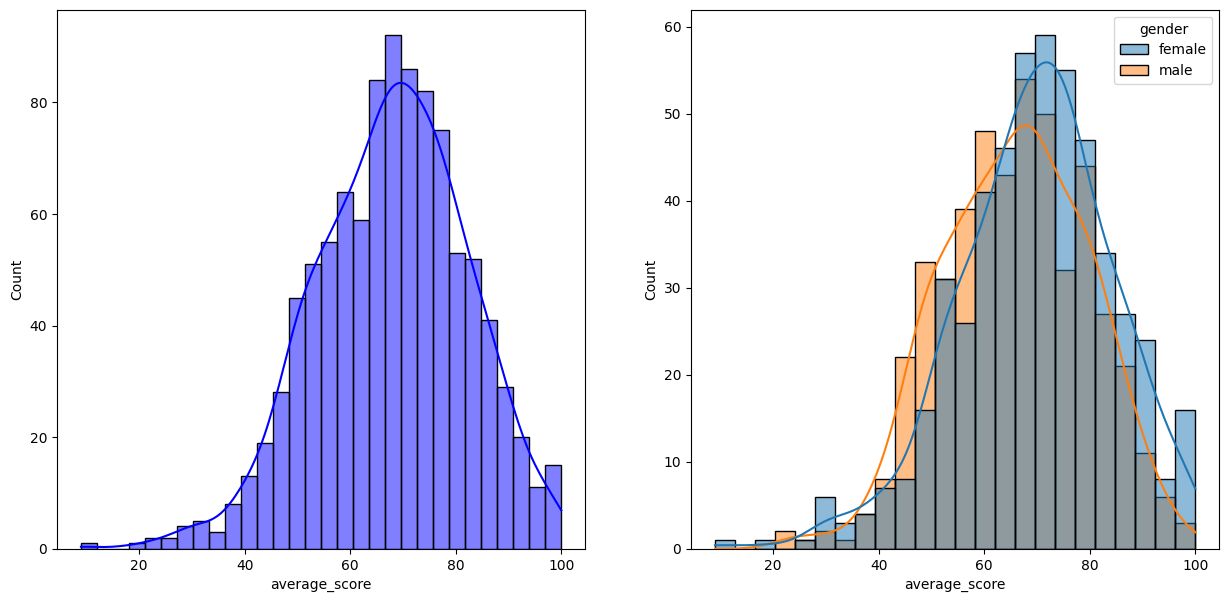

In [31]:
# Data visualization
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='blue')
plt.subplot(122)
sns.histplot(data=df, x='average_score', kde=True, hue='gender')
plt.show()

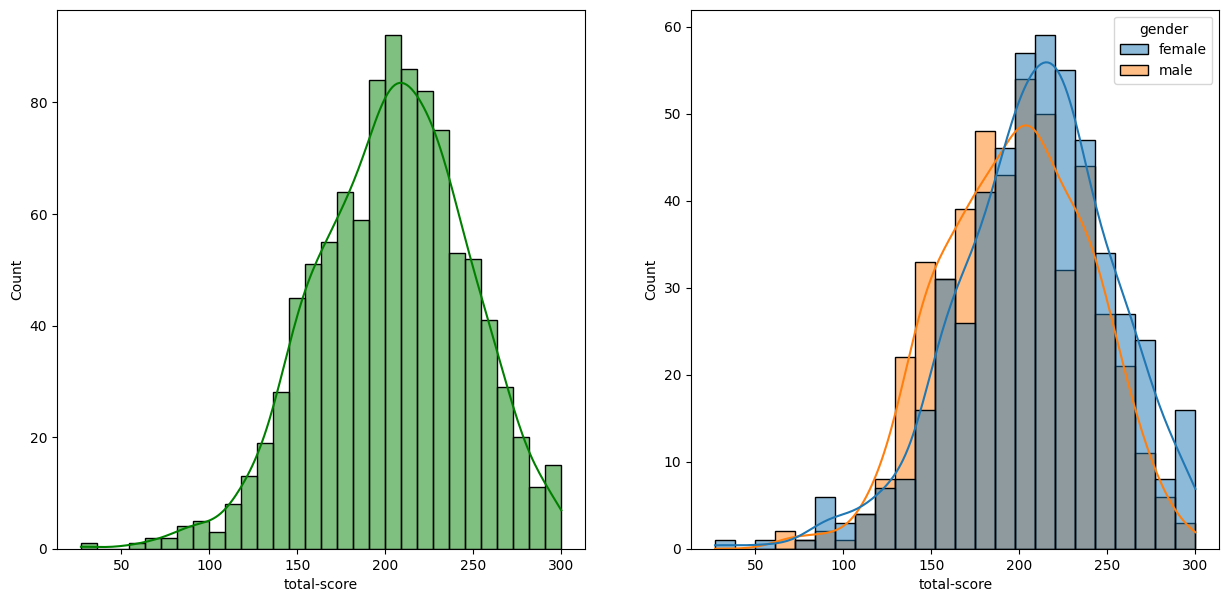

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total-score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total-score',kde=True,hue='gender')
plt.show()

**Insights:**

- Female students tend to perform well then male students.

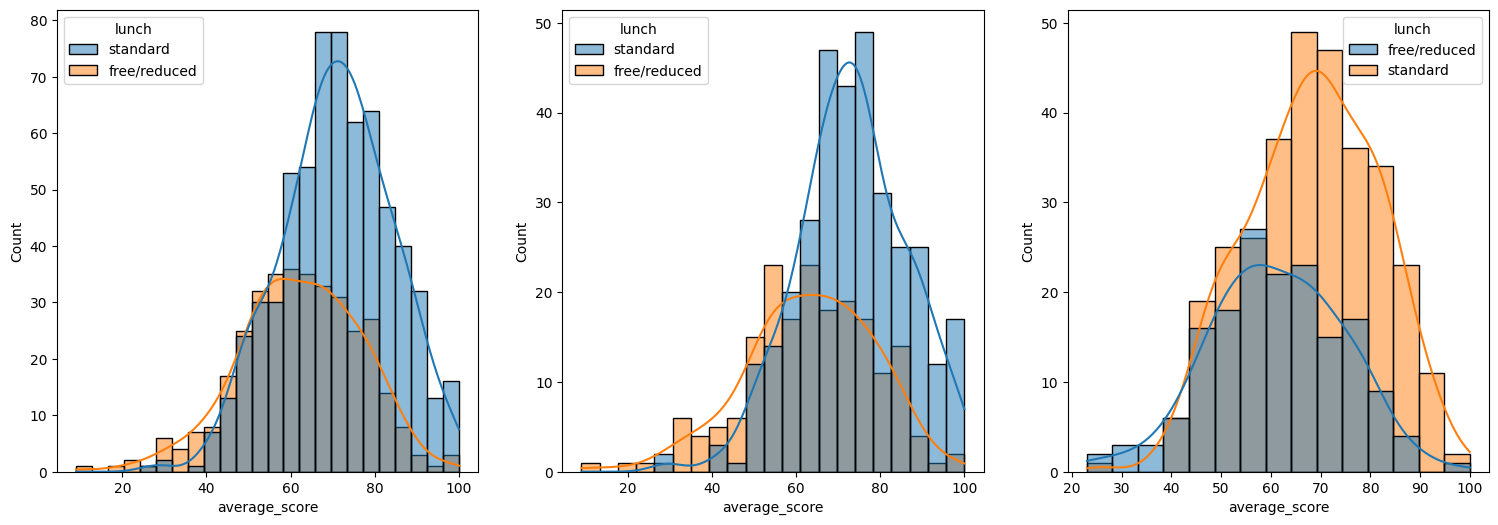

In [33]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

**Insights:**

- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams both in male and female.

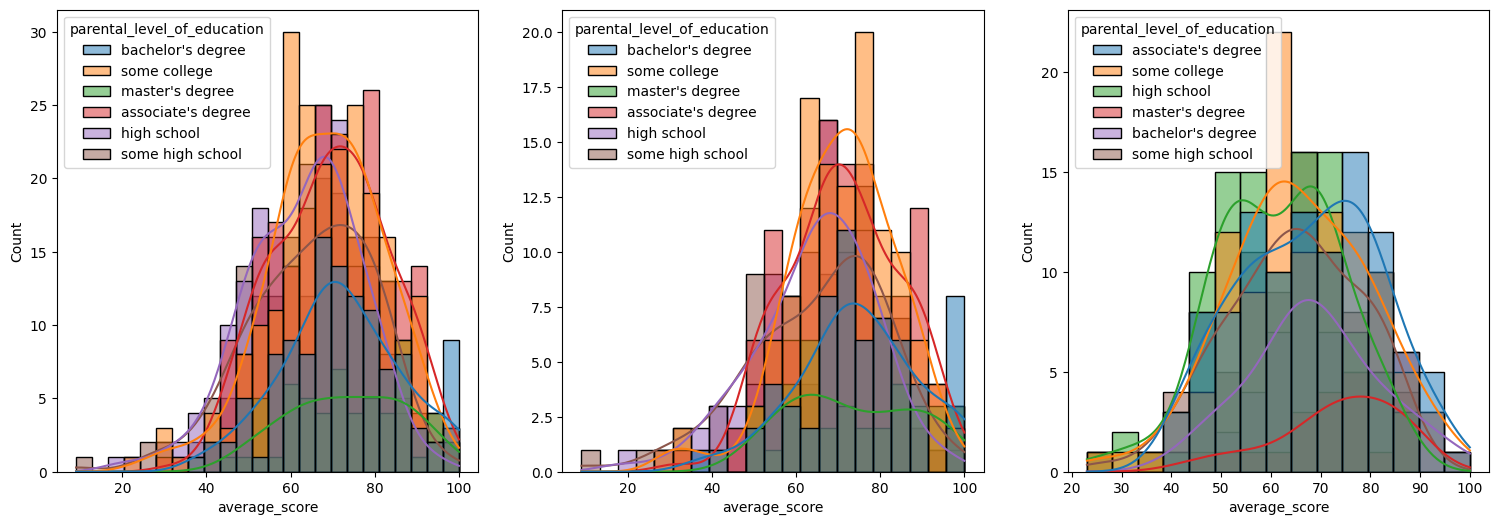

In [36]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df, x='average_score', kde=True, hue='parental_level_of_education')
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='parental_level_of_education')
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='parental_level_of_education')
plt.show()

**Insights:**

- In general parent's education don't help student perform well in exam.
- 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 2nd plot we can see that parent's whose education is of associate's degree or some college degree their female child tend to perform well in exam.

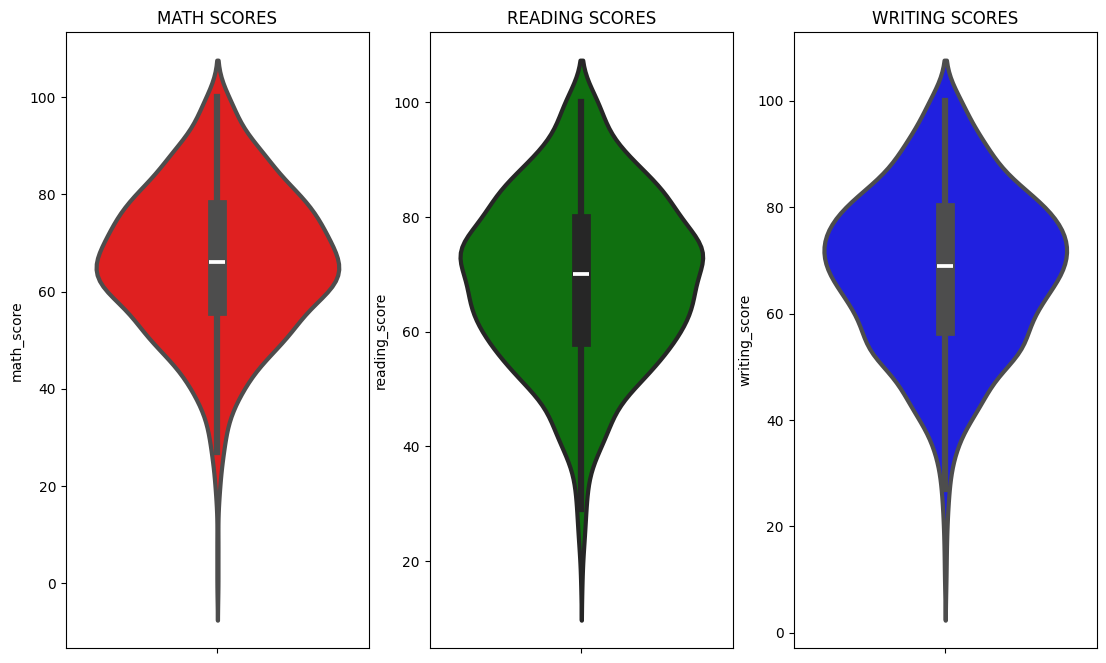

In [38]:
# Maximum score of students in all three subjects
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

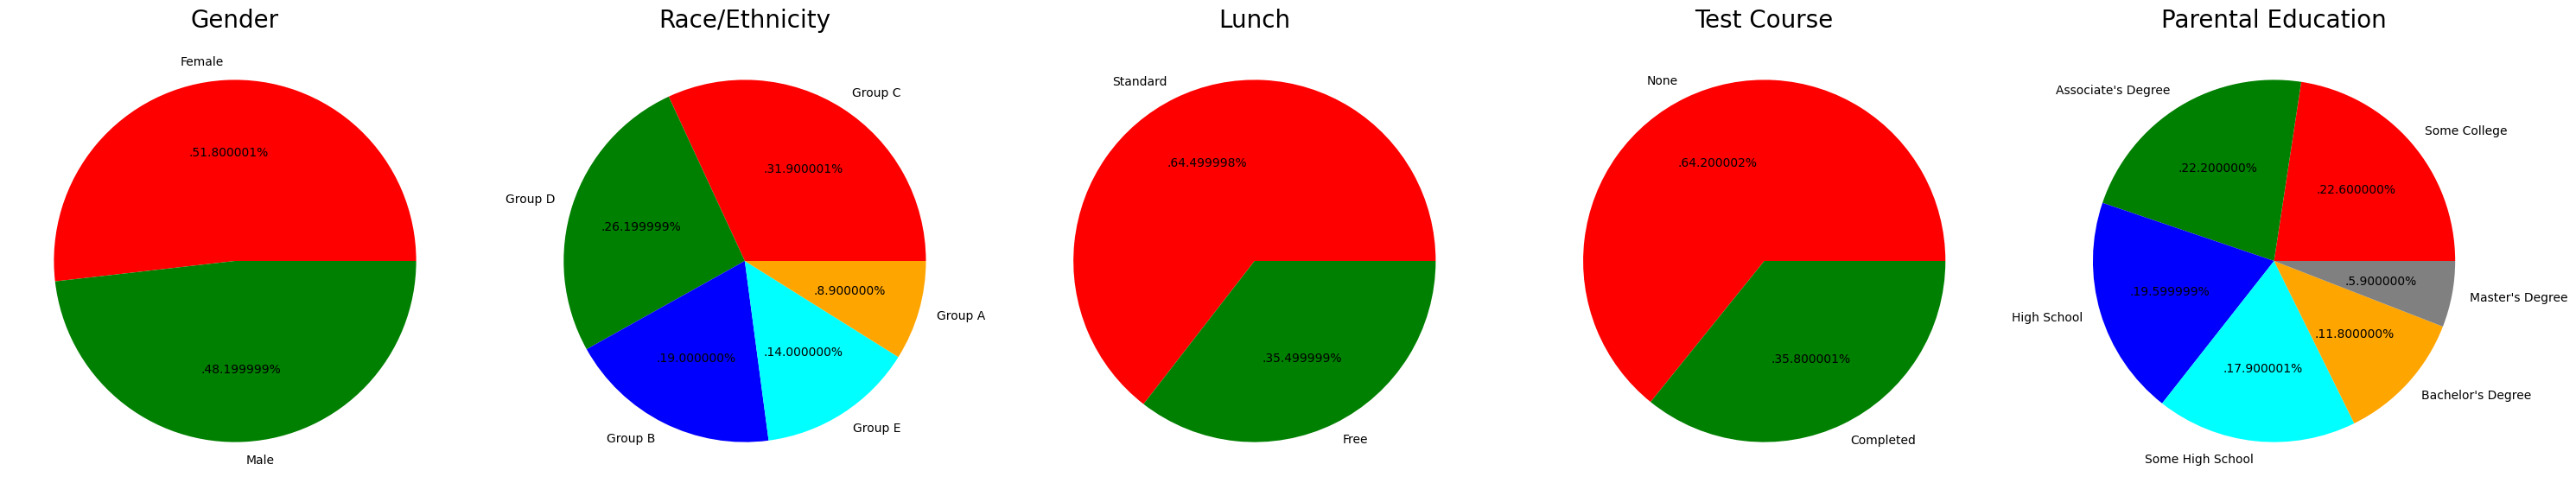

In [40]:
# Multivariate analysis using pieplot
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

**Insights:**

- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

**GENDER COLUMN:**

- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

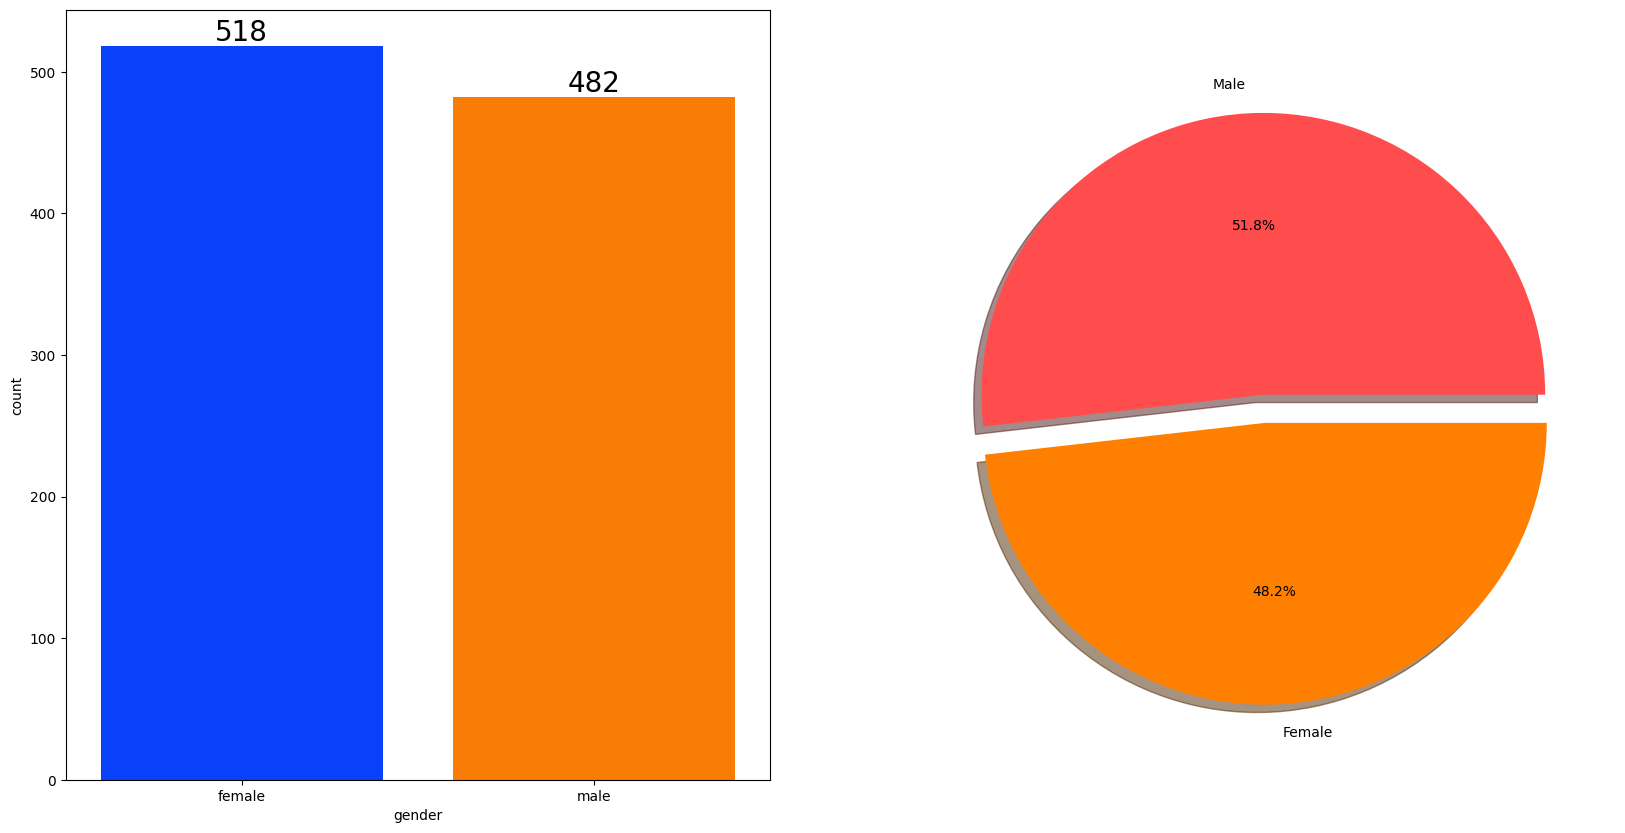

In [41]:
# UNIVARIATE ANALYSIS ( How is distribution of Gender ? )
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

**Insights:**

- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

In [45]:
# BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )
gender_group = df.groupby('gender')
gender_group

**RACE/EHNICITY COLUMN:**

- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

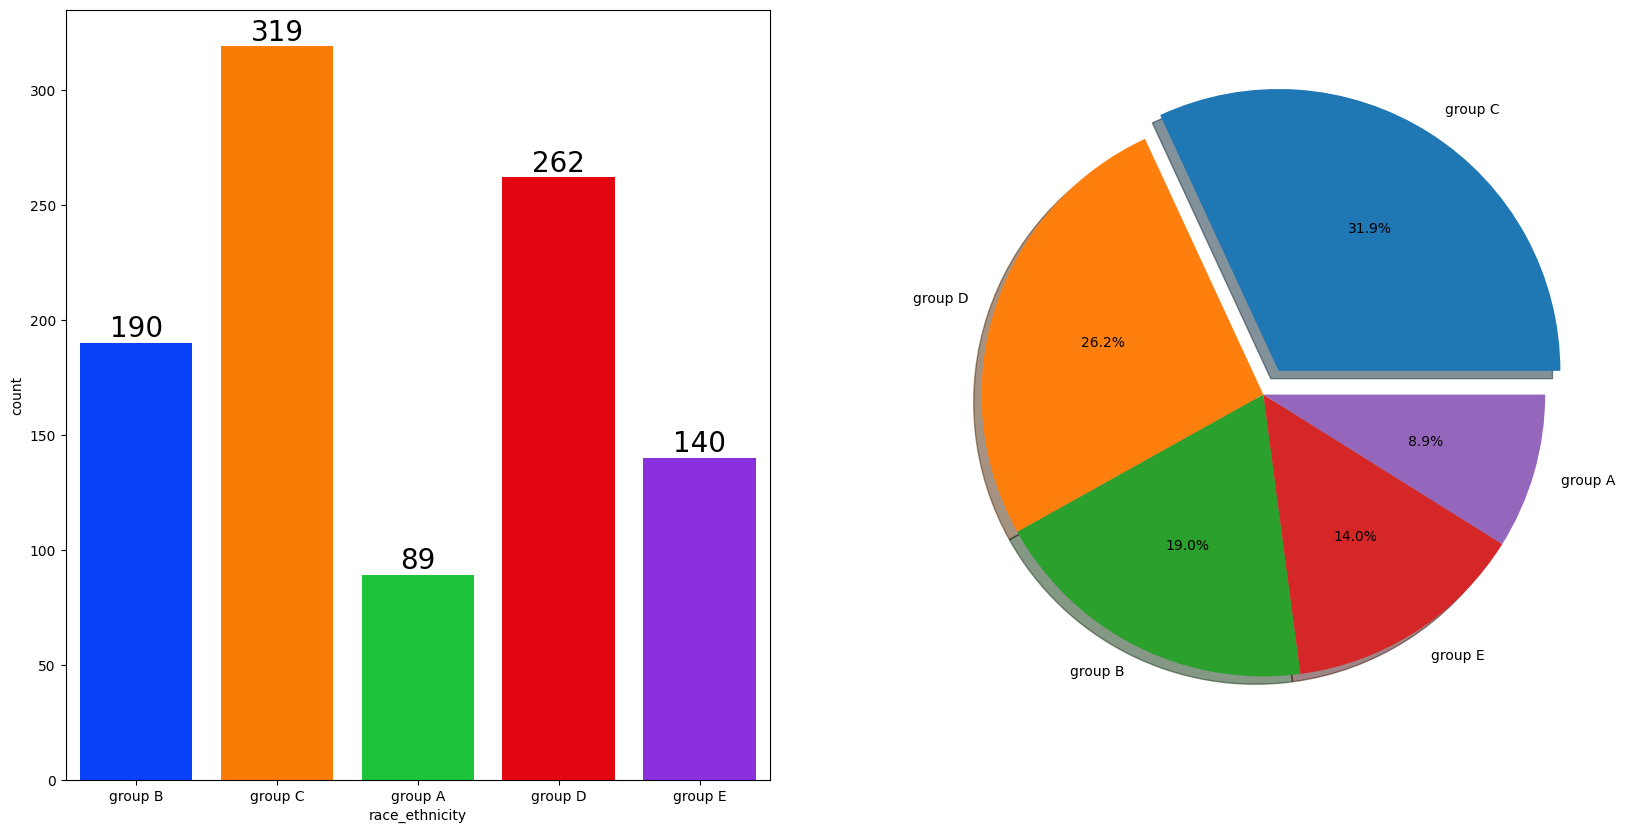

In [47]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

**Insights:**

- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

**BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )**


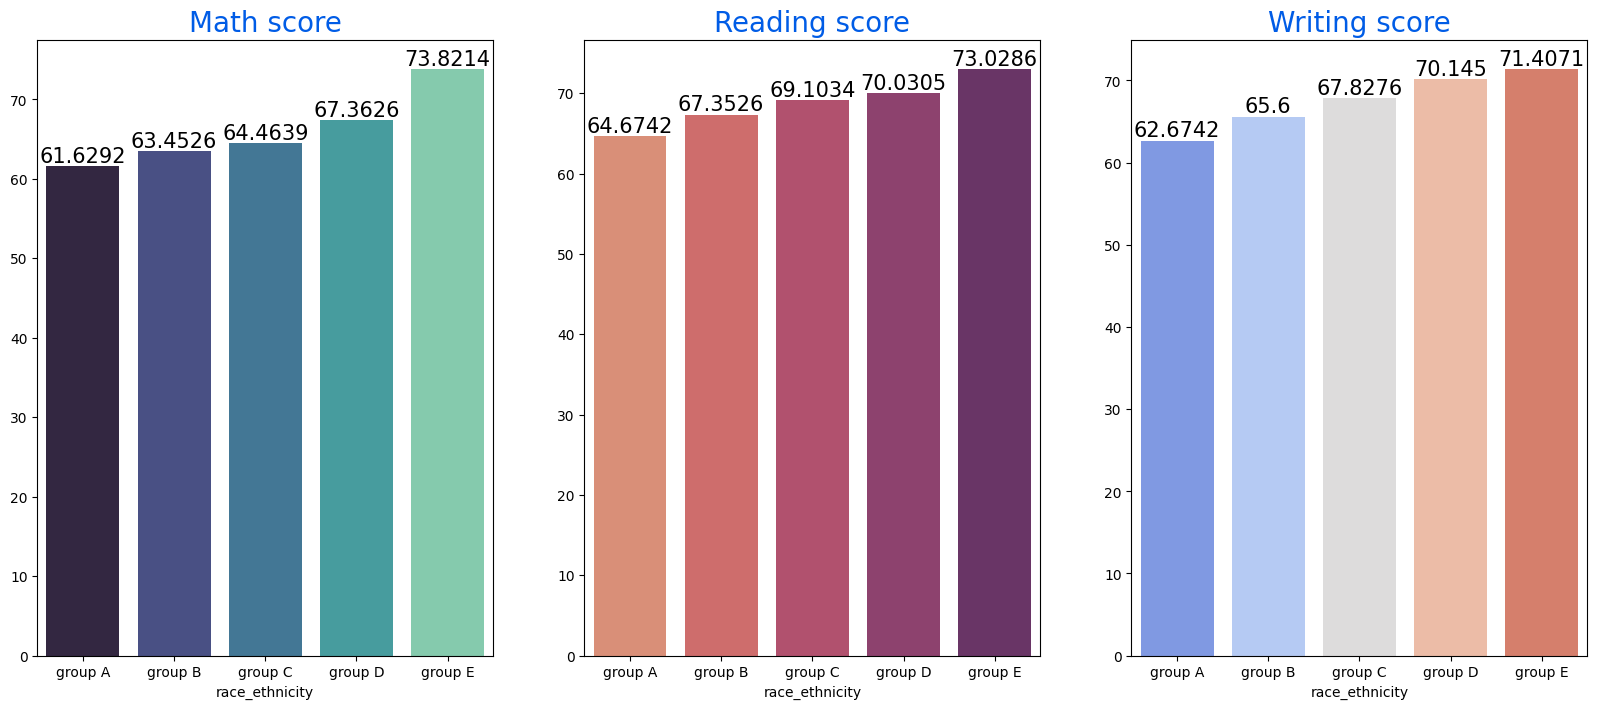

In [50]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

**Insights:**

- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

### PARENTAL LEVEL OF EDUCATION COLUMN

- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

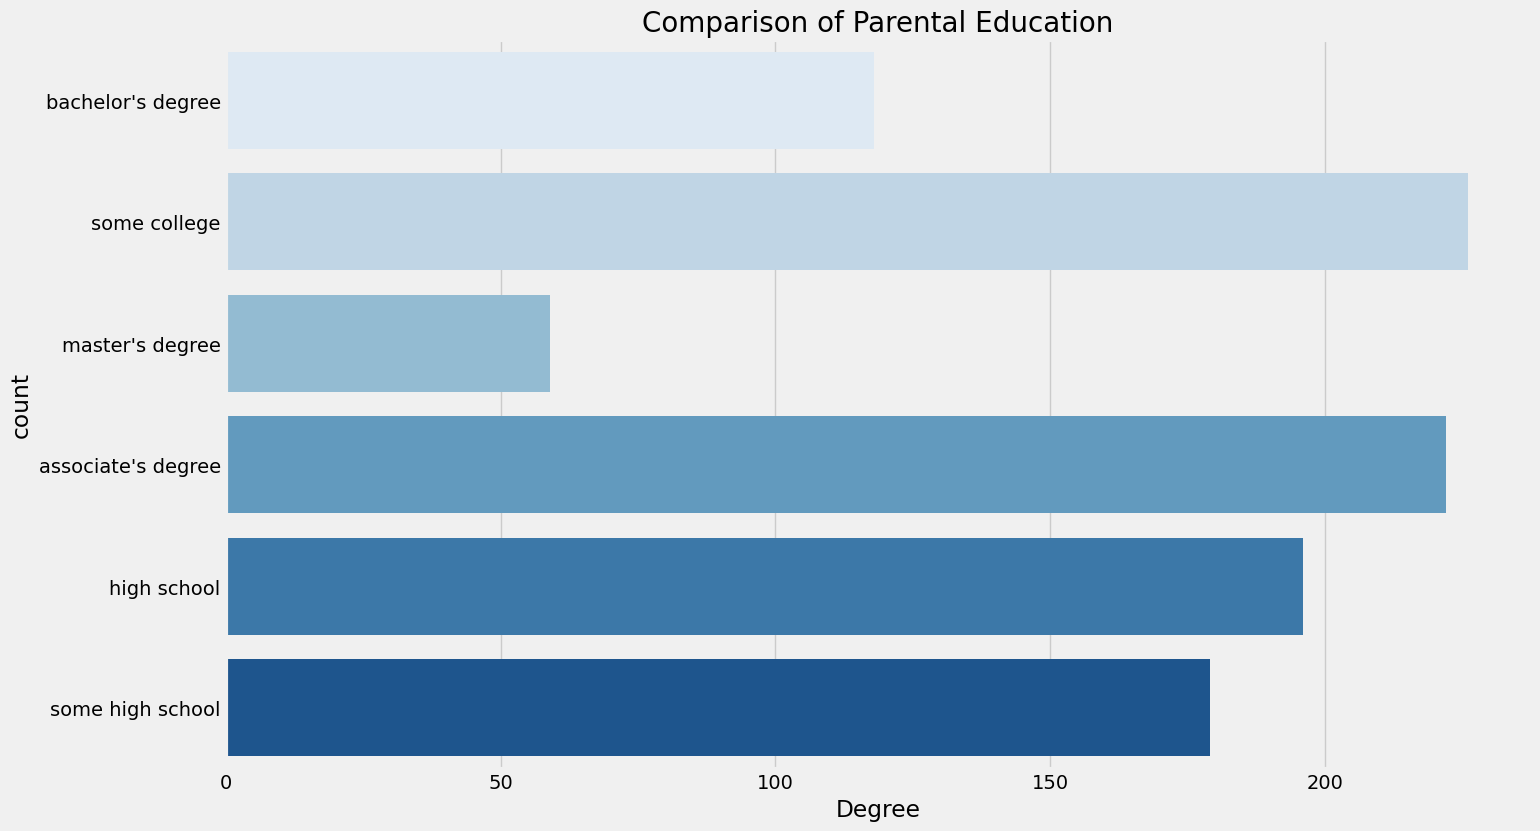

In [51]:
# UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

**Insights:**

- Largest number of parents are from some college.

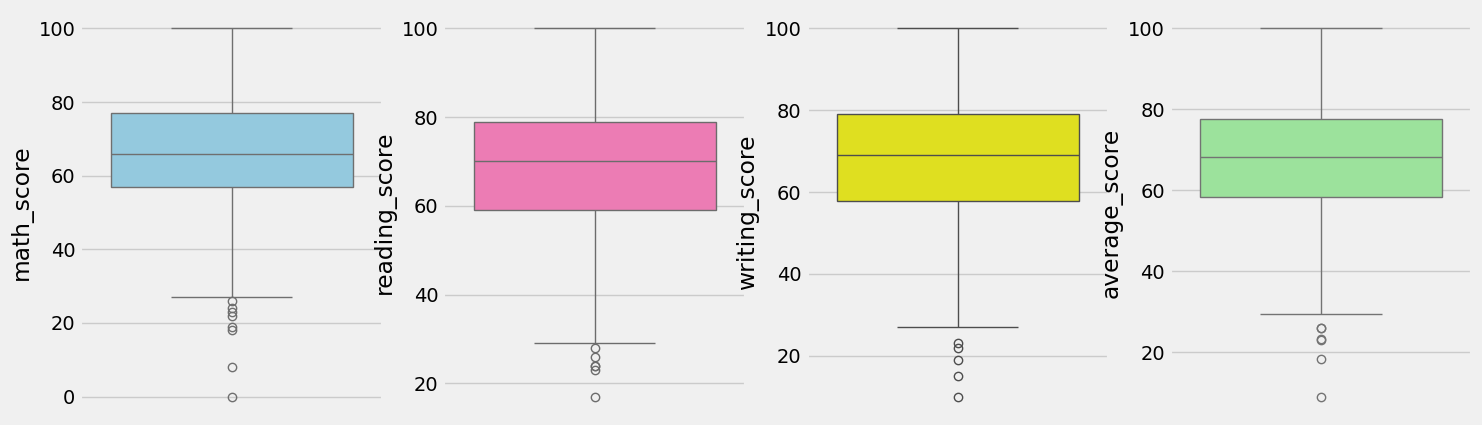

In [54]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

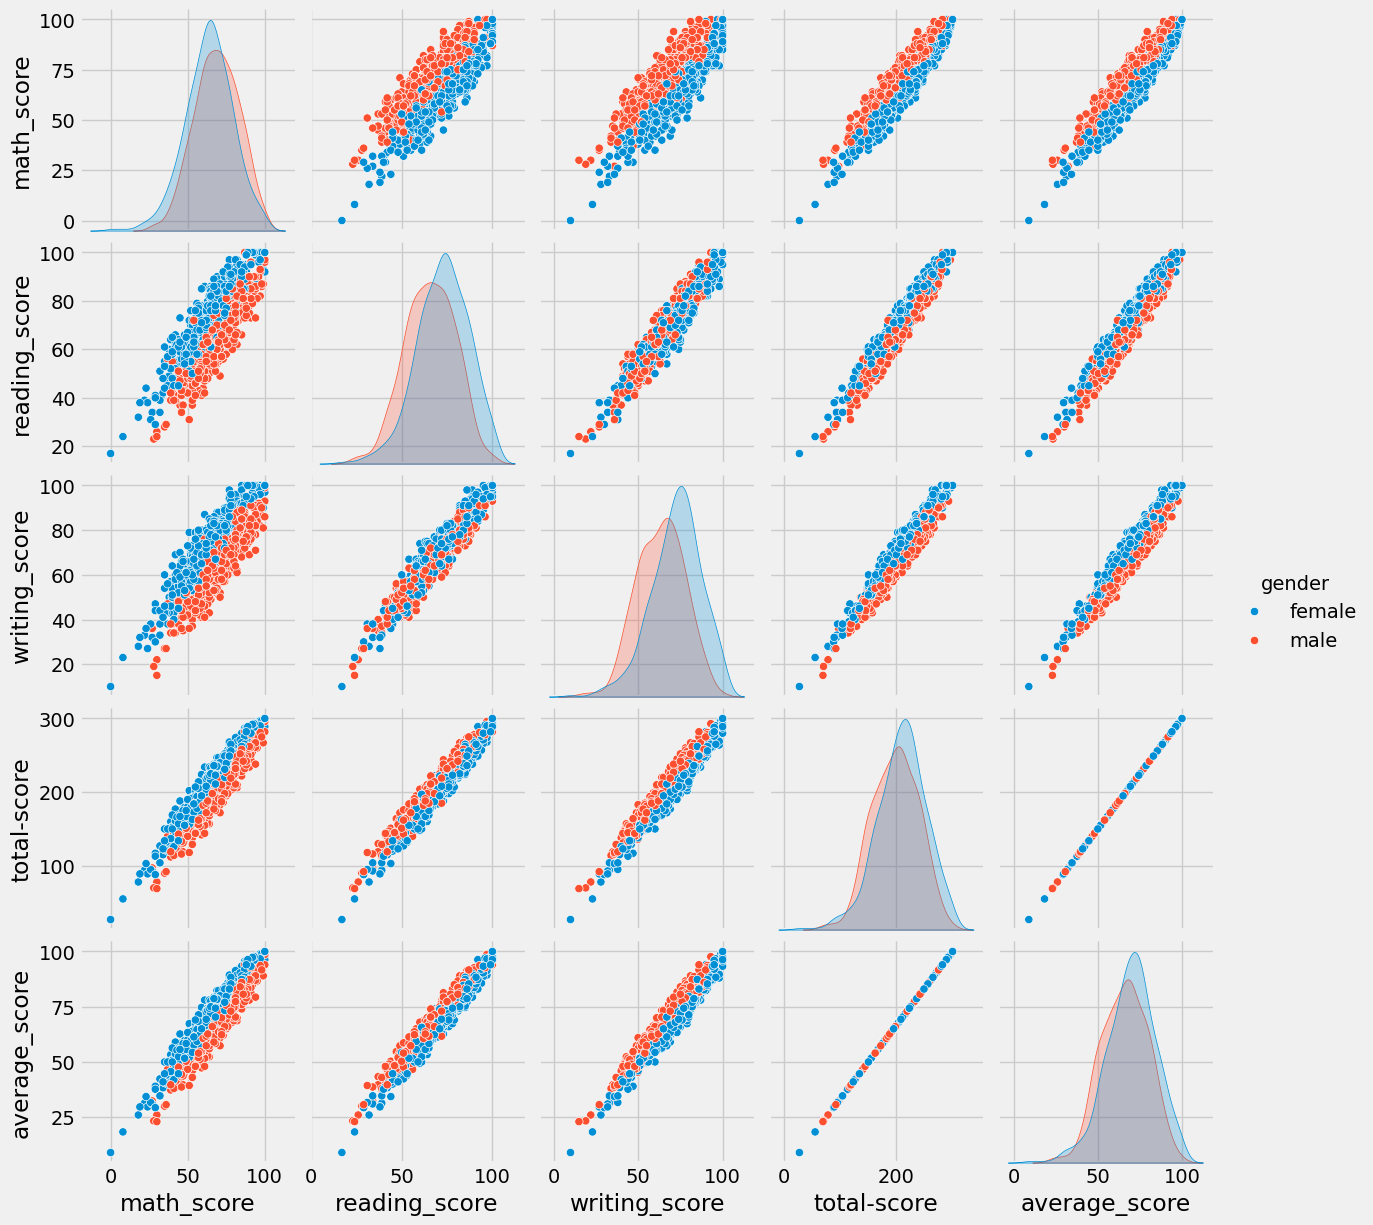

In [55]:
# MUTIVARIATE ANALYSIS USING PAIRPLOT
sns.pairplot(df,hue = 'gender')
plt.show()

**Insight:**

- From the above plot it is clear that all the scores increase linearly with each other.